### 2-3 Import excel

#### Task 1

Download and use `tensile_test_data1.xlsx` from Github.

Step 1: Click the Folder Icon on the left sidebar.

Step 2: Click the Upload icon (paper with an up arrow) or simply drag and drop the .xlsx file into the pane.

Step 3: Use pandas to read it.

Use this code to check;
```
import pandas as pd

# 'filename.xlsx' must match the name of the file you uploaded
df = pd.read_excel('filename.xlsx')
df.head()
```

In [21]:
import pandas as pd

# 'filename.xlsx' must match the name of the file you uploaded
df = pd.read_excel('tensile_test_data1.xlsx')
df.head()

,Strain (mm/mm),Stress (MPa),Material
0,0.000,0,A36 Steel
1,0.002,410,A36 Steel
2,0.005,520,A36 Steel
3,0.010,580,A36 Steel
4,0.020,610,A36 Steel


#### Task 2

Draw the Stress-Strain Diagram.

Use this plot command to get the data.

`plt.plot(df['Strain (mm/mm)'], df['Stress (MPa)'], marker='o', linestyle='-', color='b')`

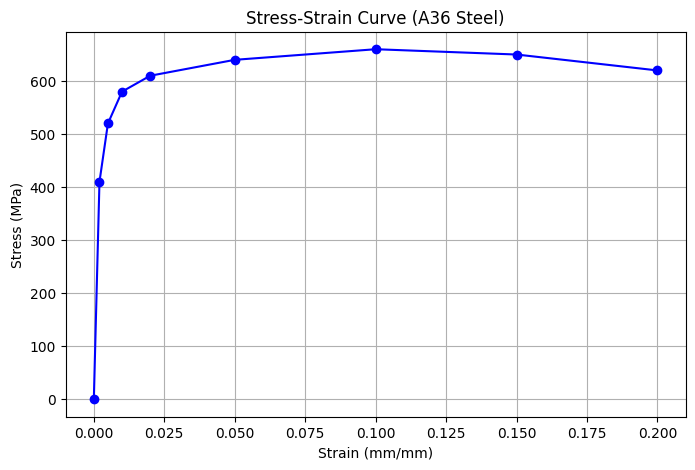

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df['Strain (mm/mm)'], df['Stress (MPa)'], marker='o', linestyle='-', color='b')

plt.title('Stress-Strain Curve (A36 Steel)')
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.grid(True)
plt.show()

#### Task 3

Use `tensile_aluminum.xlsx` and `tensile_carbon_fiber.xlsx` Plot all three excel data to show comparison of material.

Hint:

Upload all 3 files to Colab.

Load all three files.
```

steel = pd.read_excel('tensile_test_data1.xlsx')
aluminum = pd.read_excel('tensile_aluminum.xlsx')
carbon = pd.read_excel('tensile_carbon_fiber.xlsx')
```

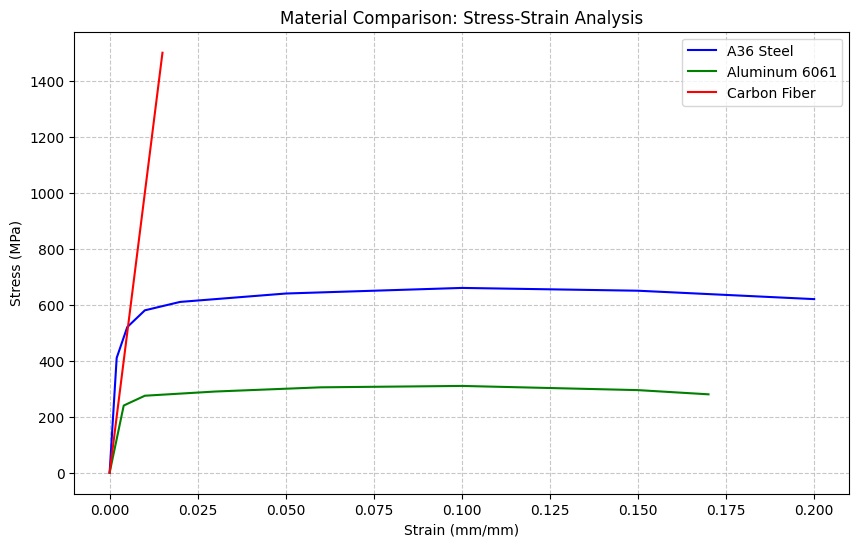

In [23]:


# 1. Load the three files (Assuming they are uploaded to Colab)
steel = pd.read_excel('tensile_test_data1.xlsx')
aluminum = pd.read_excel('tensile_aluminum.xlsx')
carbon = pd.read_excel('tensile_carbon_fiber.xlsx')

# 2. Plotting all three on one graph
plt.figure(figsize=(10, 6))

plt.plot(steel['Strain (mm/mm)'], steel['Stress (MPa)'], label='A36 Steel', color='blue')
plt.plot(aluminum['Strain (mm/mm)'], aluminum['Stress (MPa)'], label='Aluminum 6061', color='green')
plt.plot(carbon['Strain (mm/mm)'], carbon['Stress (MPa)'], label='Carbon Fiber', color='red')

plt.title('Material Comparison: Stress-Strain Analysis')
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Task 4

Find gradient of the A36 Steel using the codes below. Draw the graph.

```
import numpy as np

# 1. Load the Steel sheet
# df = pd.read_excel('tensile_test_data1.xlsx', sheet_name='Steel')

# 2. Select the first 3 points (The Elastic Region)
# We use .iloc[:2] to get the first two rows
strain_elastic = df['Strain (mm/mm)'].iloc[:2]
stress_elastic = df['Stress (MPa)'].iloc[:2]

# 3. Calculate the gradient (Slope)
# polyfit returns [slope, intercept] for a 1st-degree polynomial (linear)
slope, intercept = np.polyfit(strain_elastic, stress_elastic, 1)

print(f"The Modulus of Elasticity (E) is: {slope:.2f} MPa")
# Note: For Steel, this should be around 200,000 MPa (or 200 GPa)

# Create the line of best fit based on the slope we found
best_fit_line = slope * strain_elastic + intercept

plt.scatter(strain_elastic, stress_elastic, color='red', label='Raw Data (Elastic)')
plt.plot(strain_elastic, best_fit_line, color='blue', label=f'Best Fit (E = {slope:.0f} MPa)')
```

The Modulus of Elasticity (E) is: 205000.00 MPa


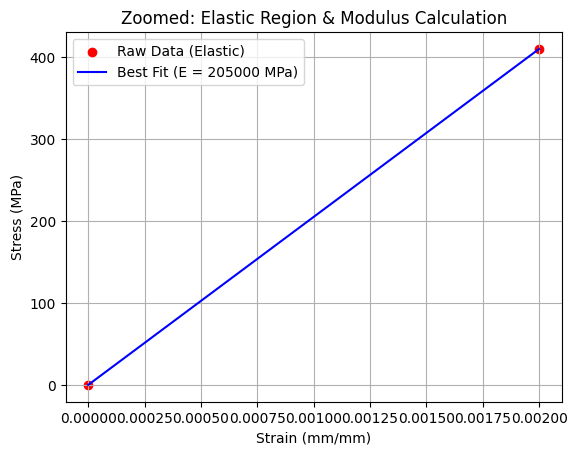

In [24]:
# import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

# 1. Load the Steel sheet
df = pd.read_excel('tensile_test_data1.xlsx')

# 2. Select the first 3 points (The Elastic Region)
# We use .iloc[:3] to get the first three rows
strain_elastic = df['Strain (mm/mm)'].iloc[:2]
stress_elastic = df['Stress (MPa)'].iloc[:2]

# 3. Calculate the gradient (Slope)
# polyfit returns [slope, intercept] for a 1st-degree polynomial (linear)
slope, intercept = np.polyfit(strain_elastic, stress_elastic, 1)

print(f"The Modulus of Elasticity (E) is: {slope:.2f} MPa")
# Note: For Steel, this should be around 200,000 MPa (or 200 GPa)

# Create the line of best fit based on the slope we found
best_fit_line = slope * strain_elastic + intercept

plt.scatter(strain_elastic, stress_elastic, color='red', label='Raw Data (Elastic)')
plt.plot(strain_elastic, best_fit_line, color='blue', label=f'Best Fit (E = {slope:.0f} MPa)')

plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.title('Zoomed: Elastic Region & Modulus Calculation')
plt.legend()
plt.grid(True)
plt.show()


#### Task 5

Create plotting animation for Shear-Stress Diagram for Steel.

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 1. Load the data
df = pd.read_excel('tensile_test_data1.xlsx')
x = df['Strain (mm/mm)']
y = df['Stress (MPa)']

# 2. Setup the Plot Canvas
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, max(x) * 1.1)
ax.set_ylim(0, max(y) * 1.1)
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (MPa)')
ax.set_title('Animated Tensile Test: A36 Steel')
ax.grid(True, linestyle='--', alpha=0.6)

# Create the objects we want to animate
line, = ax.plot([], [], 'b-', lw=2, label='Tensile Curve')
point, = ax.plot([], [], 'ro')  # Red dot at the leading edge
text = ax.text(0.01, max(y)*0.9, '', fontsize=12)

# 3. The Animation Functions
def init():
    line.set_data([], [])
    point.set_data([], [])
    text.set_text('')
    return line, point, text

def update(frame):
    # 'frame' is the index (0 to 19)
    current_x = x[:frame+1]
    current_y = y[:frame+1]
    
    line.set_data(current_x, current_y)
    point.set_data([x[frame]], [y[frame]]) # Note: set_data expects sequences
    
    # Update live text for Stress/Strain
    text.set_text(f'Strain: {x[frame]:.3f}\nStress: {y[frame]:.1f} MPa')
    
    return line, point, text

# 4. Create and Display Animation
# frames=len(x) means one frame per row in your Excel
ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True, interval=200)

# In Google Colab, we use this to render the video
plt.close() # Prevents a static plot from appearing below
HTML(ani.to_html5_video())